In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [7]:
# Load the data
data = pd.read_csv('Resources/cleaned-sales-data-with-dummies-and-no-outliers-June11.csv')

# Print the columns to check for the correct column name
print(data.columns)

Index(['Unnamed: 0', 'FinishedSqft', 'Lotsize', 'Bdrms', 'Baths_total',
       'Sale_year', 'Sale_month', 'Sale_price', 'Style_AP 1', 'Style_Bi-Level',
       'Style_Cape Cod', 'Style_Colonial', 'Style_Contemporary',
       'Style_Cottage', 'Style_Dplx Bungalow', 'Style_Duplex N/S',
       'Style_Duplex O/S', 'Style_Duplex-Cottage', 'Style_Milwaukee Bungalow',
       'Style_Multiple Residential Bldgs', 'Style_Ranch',
       'Style_Res O/S 1 Story', 'Style_Res O/S 2sty +',
       'Style_Res O/S A & 1/2', 'Style_Residence O/S',
       'Style_Residence O/S 2sty+', 'Style_Split Level', 'Style_Townhouse',
       'Style_Triplex', 'Style_Tudor', 'Extwall_Alum/Vynyl Siding',
       'Extwall_Aluminum / Vinyl', 'Extwall_Aluminum/Vinyl',
       'Extwall_Asphalt/Other', 'Extwall_Block', 'Extwall_Brick',
       'Extwall_Fiber Cement/Hardiplank', 'Extwall_Fiber-Cement',
       'Extwall_Frame', 'Extwall_Masonary Frame', 'Extwall_Masonry / Frame',
       'Extwall_Masonry/Frame', 'Extwall_Metal Siding'

In [8]:
data.info(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30383 entries, 0 to 30382
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Unnamed: 0                        30383 non-null  int64
 1   FinishedSqft                      30383 non-null  int64
 2   Lotsize                           30383 non-null  int64
 3   Bdrms                             30383 non-null  int64
 4   Baths_total                       30383 non-null  int64
 5   Sale_year                         30383 non-null  int64
 6   Sale_month                        30383 non-null  int64
 7   Sale_price                        30383 non-null  int64
 8   Style_AP 1                        30383 non-null  bool 
 9   Style_Bi-Level                    30383 non-null  bool 
 10  Style_Cape Cod                    30383 non-null  bool 
 11  Style_Colonial                    30383 non-null  bool 
 12  Style_Contemporary              

In [9]:
#Checking to make sure there are no nulls 
data.isnull().sum()

Unnamed: 0                          0
FinishedSqft                        0
Lotsize                             0
Bdrms                               0
Baths_total                         0
Sale_year                           0
Sale_month                          0
Sale_price                          0
Style_AP 1                          0
Style_Bi-Level                      0
Style_Cape Cod                      0
Style_Colonial                      0
Style_Contemporary                  0
Style_Cottage                       0
Style_Dplx Bungalow                 0
Style_Duplex N/S                    0
Style_Duplex O/S                    0
Style_Duplex-Cottage                0
Style_Milwaukee Bungalow            0
Style_Multiple Residential Bldgs    0
Style_Ranch                         0
Style_Res O/S 1 Story               0
Style_Res O/S 2sty +                0
Style_Res O/S A & 1/2               0
Style_Residence O/S                 0
Style_Residence O/S 2sty+           0
Style_Split 

In [11]:
#creating the independent variables set 
X = data.drop(columns=['Unnamed: 0','Sale_price'])
X.head()

,FinishedSqft,Lotsize,Bdrms,Baths_total,Sale_year,Sale_month,Style_AP 1,Style_Bi-Level,Style_Cape Cod,Style_Colonial,...,Extwall_Fiber-Cement,Extwall_Frame,Extwall_Masonary Frame,Extwall_Masonry / Frame,Extwall_Masonry/Frame,Extwall_Metal Siding,Extwall_Prem Wood,Extwall_Stone,Extwall_Stucco,Extwall_Wood
0,504,5580,2,2,2013,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,532,3600,2,1,2023,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,550,8640,2,2,2018,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,572,7425,2,1,2020,12,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,581,3300,2,1,2023,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# creating the dependent variable set 
y = data['Sale_price']
y.head()

0     92500
1    253000
2    190000
3     85000
4    175000
Name: Sale_price, dtype: int64

In [13]:
# spliting data into training and testing 90/10 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Linear Regression


In [14]:
# setting the model to linear regression 
model = LinearRegression()
# fitting the model 
model.fit(X_train, y_train)

LinearRegression()

In [15]:
coef = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coef

,Coefficient
FinishedSqft,68.195735
Lotsize,0.612739
Bdrms,-4716.339703
Baths_total,20632.349240
Sale_year,8986.372392
Sale_month,730.829319
Style_AP 1,98673.406054
Style_Bi-Level,-16877.311243
Style_Cape Cod,2126.226608
Style_Colonial,13000.239654


In [16]:
# Prediction with test data 
y_pred = model.predict(X_test)
# getting mean square 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3123771166.6005197


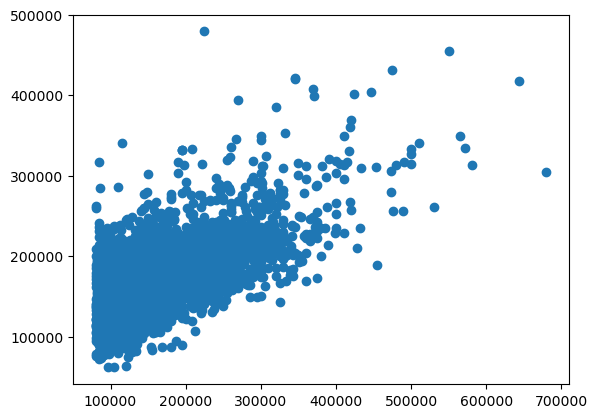

In [17]:
plt.scatter(y_test, y_pred)

In [18]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,269147.218450
1,197865.166181
2,244140.738508
3,170427.520925
4,178147.292778
...,...
3034,261953.592306
3035,120645.069412
3036,128363.249160
3037,185043.633265


In [19]:
y_test

22732    312000
23518    135000
25049    250000
14214     96000
8085     147000
          ...  
29873     80000
20967     89900
16229    159000
18209    270000
6000      88900
Name: Sale_price, Length: 3039, dtype: int64

In [20]:
# determining accuracy score 
model.score(X_test, y_test)

0.40550577555424416

## Random Forest Regressor

In [21]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
y_pred = model.predict(X_test)
# getting mean square 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2888275825.6816235


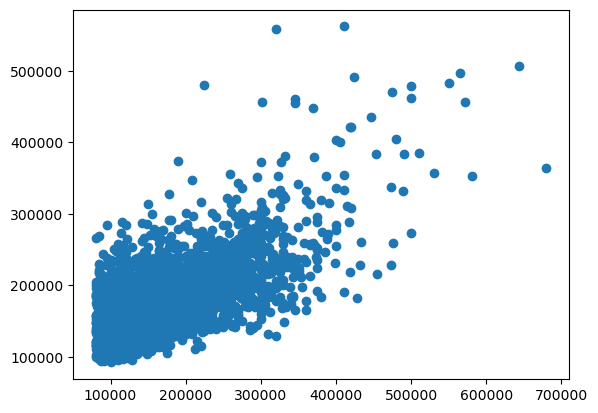

In [23]:
plt.scatter(y_test, y_pred)

In [24]:
X_test.head()

,FinishedSqft,Lotsize,Bdrms,Baths_total,Sale_year,Sale_month,Style_AP 1,Style_Bi-Level,Style_Cape Cod,Style_Colonial,...,Extwall_Fiber-Cement,Extwall_Frame,Extwall_Masonary Frame,Extwall_Masonry / Frame,Extwall_Masonry/Frame,Extwall_Metal Siding,Extwall_Prem Wood,Extwall_Stone,Extwall_Stucco,Extwall_Wood
22732,1693,5360,3,3,2020,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23518,1754,5000,2,1,2020,12,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25049,1879,4520,4,2,2022,4,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
14214,1272,7540,3,3,2016,8,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8085,1100,7616,3,2,2020,11,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3039 entries, 22732 to 6000
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   FinishedSqft                      3039 non-null   int64
 1   Lotsize                           3039 non-null   int64
 2   Bdrms                             3039 non-null   int64
 3   Baths_total                       3039 non-null   int64
 4   Sale_year                         3039 non-null   int64
 5   Sale_month                        3039 non-null   int64
 6   Style_AP 1                        3039 non-null   bool 
 7   Style_Bi-Level                    3039 non-null   bool 
 8   Style_Cape Cod                    3039 non-null   bool 
 9   Style_Colonial                    3039 non-null   bool 
 10  Style_Contemporary                3039 non-null   bool 
 11  Style_Cottage                     3039 non-null   bool 
 12  Style_Dplx Bungalow               3

In [26]:
model.score(X_test, y_test)

0.4503235975371923

House Price Prediction Using Elle's Model and the Previous (Unfiltered) Dataset

In [26]:
listings_data_df = pd.read_csv("Resources/original_extracted_df_MilwaukeeOnly.csv")
listings_data_df.head()

,State,City,Street,Zipcode,Latitude,Longitude,Bedroom,Bathroom,Area,PPSq,LotArea,ConvertedLot,LotUnit,MarketEstimate,RentEstimate,Price
0,WI,Milwaukee,North 26th STREET,53206,43.076214,-87.946370,4,2,NaN,NaN,3920.40,0.09,sqft,NaN,1425.0,7000
1,WI,Milwaukee,North 37th STREET,53210,43.066345,-87.959490,4,2,1714.0,20.361727,3484.80,0.08,sqft,NaN,1345.0,34900
2,WI,Milwaukee,North Sherman BOULEVARD UNIT 4326,53216,43.095818,-87.966620,4,2,1500.0,83.266667,0.62,0.62,acres,NaN,NaN,124900
3,WI,Milwaukee,North 25th STREET,53205,43.056957,-87.944756,3,2,1184.0,114.020270,4356.00,0.10,sqft,132800.0,1500.0,135000
4,WI,Milwaukee,North 86th PLACE,53225,43.121850,-88.019295,3,2,1271.0,106.215578,7840.80,0.18,sqft,136300.0,1875.0,135000


In [27]:
listings_data_df = listings_data_df.drop(columns=['PPSq', 'ConvertedLot','LotUnit','RentEstimate'], axis=1)
listings_data_df = listings_data_df[['Street', 'City', 'State', 'Zipcode', 'Latitude', 'Longitude', 'Bedroom', 'Bathroom', 'Area','LotArea', 'Price','MarketEstimate']]
listings_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Street          33 non-null     object 
 1   City            33 non-null     object 
 2   State           33 non-null     object 
 3   Zipcode         33 non-null     int64  
 4   Latitude        33 non-null     float64
 5   Longitude       33 non-null     float64
 6   Bedroom         33 non-null     int64  
 7   Bathroom        33 non-null     int64  
 8   Area            32 non-null     float64
 9   LotArea         28 non-null     float64
 10  Price           33 non-null     int64  
 11  MarketEstimate  26 non-null     float64
dtypes: float64(5), int64(4), object(3)
memory usage: 3.2+ KB


In [28]:
listings_data_df = listings_data_df.rename(columns={'Bedroom': 'Bedrooms', 'Bathroom':'Bathrooms','Area':'FinishedSqft', 'LotArea': 'Lotsize'})
listings_data_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate
0,North 26th STREET,Milwaukee,WI,53206,43.076214,-87.946370,4,2,NaN,3920.40,7000,NaN
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0


In [29]:
listings_data_df.isnull().sum()

Street            0
City              0
State             0
Zipcode           0
Latitude          0
Longitude         0
Bedrooms          0
Bathrooms         0
FinishedSqft      1
Lotsize           5
Price             0
MarketEstimate    7
dtype: int64

In [30]:
listings_data_df=listings_data_df.dropna(subset=['FinishedSqft','Lotsize'])
listings_data_df.isnull().sum()

Street            0
City              0
State             0
Zipcode           0
Latitude          0
Longitude         0
Bedrooms          0
Bathrooms         0
FinishedSqft      0
Lotsize           0
Price             0
MarketEstimate    4
dtype: int64

In [31]:
prediction1_df = listings_data_df.copy()
prediction1_df['Year'] = 2024
prediction1_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate,Year
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN,2024
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN,2024
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0,2024
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0,2024
5,North 35th STREET,Milwaukee,WI,53216,43.095448,-87.957344,2,1,667.0,4356.00,137500,139700.0,2024


In [33]:
X_pred1 = prediction1_df[['Bedrooms', 'Bathrooms','FinishedSqft', 'Lotsize','Year']]
y_predicted_sales1 = model.predict(X_pred1)
listings_data_df['2024 Forecasted House Price'] = y_predicted_sales1
listings_data_df['Price Difference'] = listings_data_df['Price'] - listings_data_df['2024 Forecasted House Price']
listings_data_df['Market Estimate Difference'] = listings_data_df['MarketEstimate'] - listings_data_df['2024 Forecasted House Price']
listings_data_df

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Bathrooms
- Bedrooms
- FinishedSqft
- Lotsize
- Year
Feature names seen at fit time, yet now missing:
- bdrms
- district
- extwall_alum/vynyl siding
- extwall_aluminum / vinyl
- extwall_aluminum/vinyl
- ...
